<a href="https://colab.research.google.com/github/qwebasilio/CPE019/blob/main/Assignment_10_2_ARIMA_Model_Basilio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 10.2 | ARIMA Model
--- | ---
**Name**  |  Basilio, Wilhelm Elian
**Course & Section**  |  CPE 019-CPE32S4
**Date** | April 23, 2024

In [1]:
!pip install statsmodels --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Load your data
df = pd.read_csv('data.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

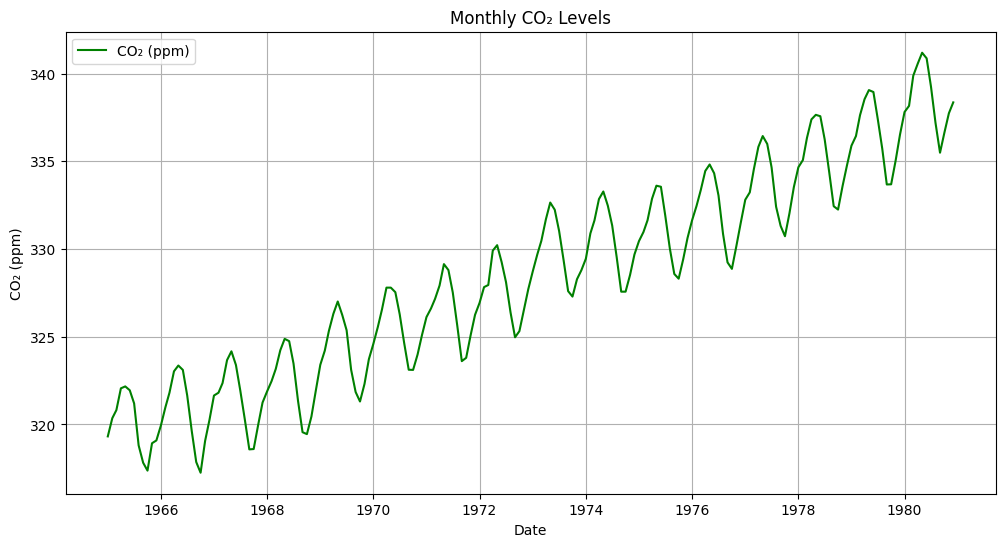

In [3]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df, label='CO₂ (ppm)', color='green')
plt.title('Monthly CO₂ Levels')
plt.xlabel('Date')
plt.ylabel('CO₂ (ppm)')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# Fit an ARIMA Model (baseline model order = (1,1,1))
model = ARIMA(df, order=(1, 1, 1))
result = model.fit()
print("Baseline ARIMA(1,1,1):")
print(result.summary())

Baseline ARIMA(1,1,1):
                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Wed, 23 Apr 2025   AIC                            457.638
Time:                        14:54:31   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [5]:
# Improve the ARIMA Model
improved_model = ARIMA(df, order=(2, 1, 2))
improved_result = improved_model.fit()

#Print the model summary
print("\nImproved ARIMA(2,1,2):")
print(improved_result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Improved ARIMA(2,1,2):
                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -190.433
Date:                Wed, 23 Apr 2025   AIC                            390.866
Time:                        14:54:31   BIC                            407.128
Sample:                    01-01-1965   HQIC                           397.453
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5418      0.059     25.914      0.000       1.425       1.658
ar.L2         -0.8373      0.069    -12.158      0.000      -0.972      -0.702
ma.L1         -0.8778      0

In [6]:
# Make a forecast (steps=10)
forecast = improved_result.get_forecast(steps=10)
forecast_df = forecast.summary_frame()

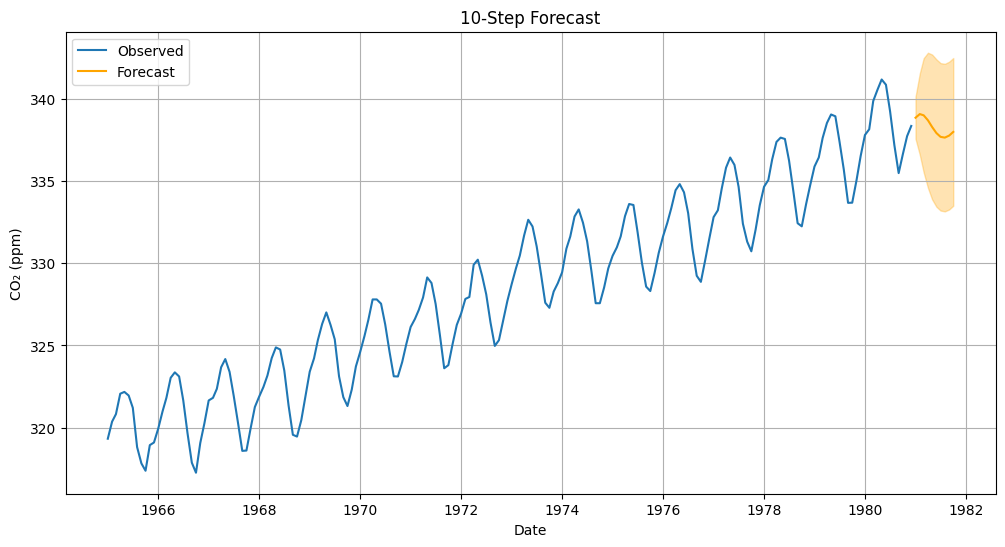

In [7]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Observed')
plt.plot(forecast_df['mean'], label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='orange', alpha=0.3)
plt.title('10-Step Forecast')
plt.xlabel('Date')
plt.ylabel('CO₂ (ppm)')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Perform a grid search
print("\nRunning grid search for best ARIMA model...")
p = d = q = range(0, 3)
pdq_combinations = list(product(p, d, q))

best_aic = np.inf
best_order = None

for order in pdq_combinations:
    try:
        model = ARIMA(df, order=order)
        result = model.fit()
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

print(f"\nBest ARIMA order from grid search: {best_order} with AIC: {best_aic}")


Running grid search for best ARIMA model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date


Best ARIMA order from grid search: (2, 1, 1) with AIC: 389.3046507521099


# Supplementary Activity

In [13]:
# Load the dataset
df_temp = pd.read_csv('dataset_temperature.csv')
print(df_temp.head())
df_temp['Month'] = pd.to_datetime(df_temp['Month'], format='%Y-%m', errors='coerce')
df_temp = df_temp.dropna(subset=['Month'])
df_temp.set_index('Month', inplace=True)
df_temp = df_temp.apply(pd.to_numeric, errors='coerce')

     Month Mean monthly temperature
0  1907-01                     33.3
1  1907-02                       46
2  1907-03                       43
3  1907-04                       55
4  1907-05                     51.8


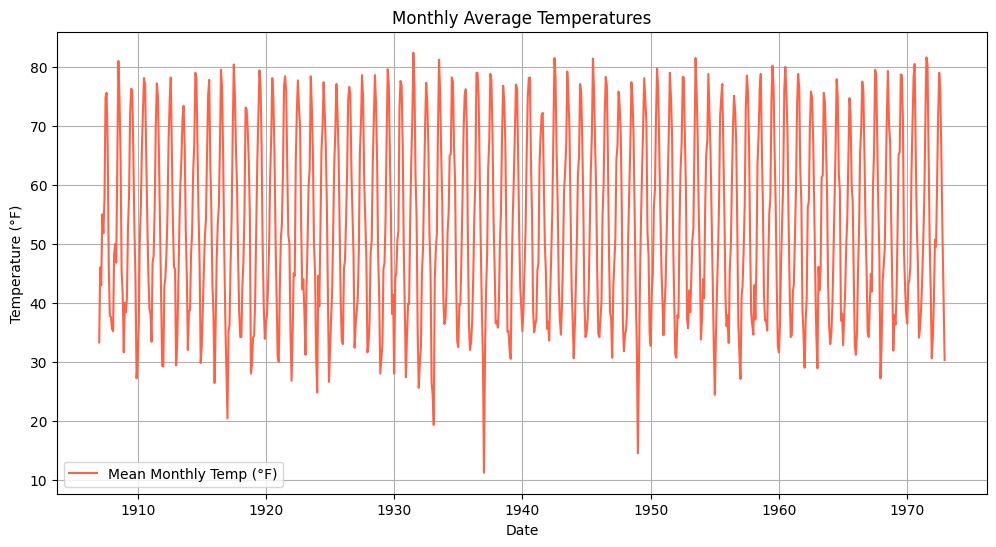

In [14]:
# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df_temp, label='Mean Monthly Temp (°F)', color='tomato')
plt.title('Monthly Average Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# Fit an ARIMA Model (baseline model order = (1,1,1))
baseline_temp_model = ARIMA(df_temp, order=(1, 1, 1))
baseline_temp_result = baseline_temp_model.fit()
print("Baseline ARIMA(1,1,1) - Temperature:")
print(baseline_temp_result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Baseline ARIMA(1,1,1) - Temperature:
                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Wed, 23 Apr 2025   AIC                           5553.192
Time:                              15:06:29   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462   

In [16]:
# Improve the ARIMA Model
improved_temp_model = ARIMA(df_temp, order=(2, 1, 2))
improved_temp_result = improved_temp_model.fit()
print("\nImproved ARIMA(2,1,2):")
print(improved_temp_result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Improved ARIMA(2,1,2):
                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(2, 1, 2)   Log Likelihood               -2412.418
Date:                      Wed, 23 Apr 2025   AIC                           4834.835
Time:                              15:06:32   BIC                           4858.202
Sample:                          01-01-1907   HQIC                          4843.816
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6854      0.012    136.899      0.000       1.661       1.710
ar.L2         -0.9474      0.012    -82.307      0.000     

In [17]:
# Make a forecast (steps=10)
temp_forecast = improved_temp_result.get_forecast(steps=10)
temp_forecast_df = temp_forecast.summary_frame()

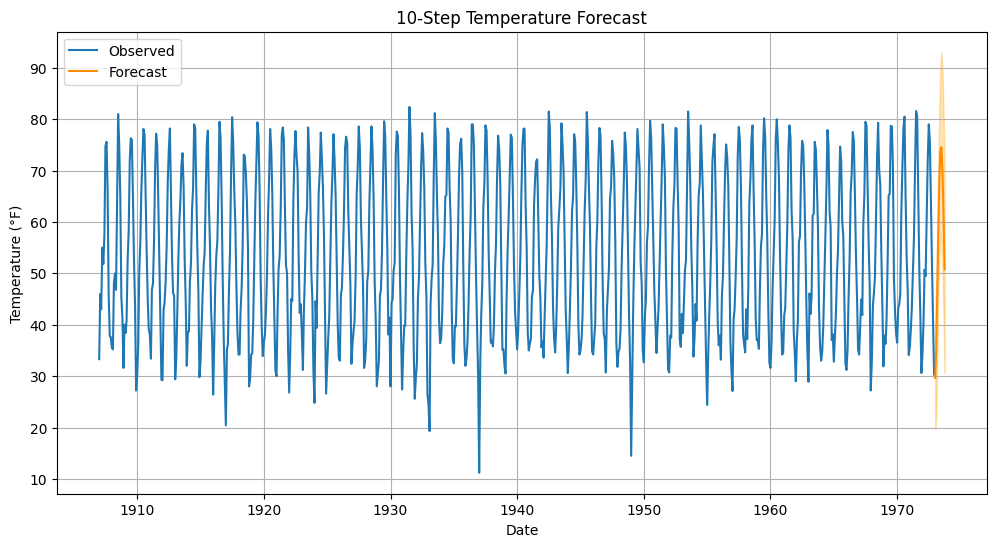

In [18]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_temp, label='Observed')
plt.plot(temp_forecast_df['mean'], label='Forecast', color='darkorange')
plt.fill_between(temp_forecast_df.index, temp_forecast_df['mean_ci_lower'], temp_forecast_df['mean_ci_upper'], color='orange', alpha=0.3)
plt.title('10-Step Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()

In [19]:
# Perform a grid search
print("\nRunning grid search for best ARIMA model (Temperature)...")
p = d = q = range(0, 3)
pdq_combinations = list(product(p, d, q))

best_aic_temp = np.inf
best_order_temp = None

for order in pdq_combinations:
    try:
        model = ARIMA(df_temp, order=order)
        result = model.fit()
        if result.aic < best_aic_temp:
            best_aic_temp = result.aic
            best_order_temp = order
    except:
        continue

print(f"\nBest ARIMA order for temperature data: {best_order_temp} with AIC: {best_aic_temp}")


Running grid search for best ARIMA model (Temperature)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date


Best ARIMA order for temperature data: (2, 0, 2) with AIC: 4578.222359007096
